## Figures for a comparison between the seismograms from the viscoacoustic/acoustic Marmousi model

### Plot the waveforms in the acoustic, viscoacoustic 1st and 2nd order models.
### Note that the direct waves are removed from the seismogram figures.

### Qi Hao, Apr. 02, 2020

In [31]:
import numpy as np
from  scipy import ndimage as ng
import matplotlib.pyplot as plt
# from pylab import rcParams
# from mpl_toolkits.axes_grid1 import make_axes_locatable

In [32]:
### create folder "figs" for the output figs
import os
if not os.path.exists('./figs'):
    os.makedirs('./figs')

In [33]:
# ### line style for pyplot. https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html
# linestyle_str = [
#      ('solid', 'solid'),      # Same as (0, ()) or '-'
#      ('dotted', 'dotted'),    # Same as (0, (1, 1)) or '.'
#      ('dashed', 'dashed'),    # Same as '--'
#      ('dashdot', 'dashdot')]  # Same as '-.'

# linestyle_tuple = [
#      ('loosely dotted',        (0, (1, 10))),
#      ('dotted',                (0, (1, 1))),
#      ('densely dotted',        (0, (1, 1))),

#      ('loosely dashed',        (0, (5, 10))),
#      ('dashed',                (0, (5, 5))),
#      ('densely dashed',        (0, (5, 1))),

#      ('loosely dashdotted',    (0, (3, 10, 1, 10))),
#      ('dashdotted',            (0, (3, 5, 1, 5))),
#      ('densely dashdotted',    (0, (3, 1, 1, 1))),

#      ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
#      ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
#      ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

In [34]:
### --------------------------------------------
def plot_check_model(field, nz, nx):
    fig = plt.figure(figsize=(7, 7))
    fig.subplots_adjust(left=.20, bottom=.16, right=.99, top=.97)

    ax = plt.gca()

    im = plt.imshow(field, aspect=1, cmap="jet")    

    plt.colorbar(im, orientation="horizontal")
    
    plt.show()
    plt.close()
### --------------------------------------------
def plot_snapshot(title,filename,field, nz, nx, dz, dx, zlab, xlab, asp=1, color="jet"):
    """ plot snapshot  """
    plt.figure(figsize=(7,4))
    fig = plt.subplots_adjust(left=0.15, bottom=0.1, top=0.95, right=0.95)
    plt.title(title)
    plt.xlim(0, (nx-1)*dx)
    plt.ylim((nz-1)*dz, 0)
    plt.xlabel(xlab, fontsize=14)
    plt.ylabel(zlab, fontsize=14)
    
    clip = 1
    max_val = np.max(np.abs(field))
    
    image = plt.imshow(field,vmin=-max_val*clip,vmax=max_val*clip, \
                       extent=[0,(nx-1)*dx,(nz-1)*dz,0],aspect=asp,cmap=color)
    plt.colorbar(image,shrink=0.7)
#     full_filename = './figs/'+filename + '.pdf'
    #plt.savefig(full_filename, dpi=800, bbox_inches="tight")
    plt.show()
    plt.close
### --------------------------------------------
def plot_data(data, nz, nx, dz, dx, oz=0, ox=0, zlab="", xlab="", \
              alpha=0, clip=1, vrange=None, asp=2, allpos=False, bar=True, barlab="", barhorn=False, \
              shnk=0.7, fsize=(7,7), color="jet", title="", fname=""):
    
    if allpos:
        min_val = np.min(data)
        max_val = np.max(data)
        ### Clip and scale data at fraction of [min, max]
        data2   = np.clip(data,-clip*max_val,clip*max_val)
    else:
        max_val = np.max(np.abs(data))
        min_val = - max_val
         ### Clip and scale data at fraction of [-max, max]
        data2   = np.clip(data, clip*min_val, clip*max_val)

    ### gain the data along the vertical axis. This is used to illustrate seismogram better.
    scale = (np.arange(nz)*dz)**alpha    
    data2 = data2 * scale[:, None]
    
    plt.figure(figsize=fsize)
    #plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)    
    
    if vrange != None:
        image = plt.imshow(data2,vmin=vrange[0],vmax=vrange[1], \
                           extent=[ox, (nx-1)*dx, (nz-1)*dz,oz], aspect=asp, cmap=color)
    else: 
        image = plt.imshow(data2,vmin=min_val*clip,vmax=max_val*clip, \
                           extent=[ox, (nx-1)*dx, (nz-1)*dz,oz], aspect=asp, cmap=color)
        
    if title.strip():
        ### title, as the argument for the plot tile, is a string. 
        ### If it is empty (such as "" or "  "), it.strip() is false.
        plt.title(title)
    
    if barhorn:
        barorien = "horizontal"
    else:
        barorien = "vertical"
        
    if bar:
        if barlab.strip():
#             plt.colorbar(image, shrink=shnk, label=barlab, orientation=barorien)
            cb = plt.colorbar(image, shrink=shnk, orientation=barorien)
            cb.set_label(label=barlab, size=14)
        else:
            plt.colorbar(image, shrink=shnk)
    
    plt.xlim(ox, (nx-1)*dx)
    plt.ylim((nz-1)*dz, oz)
    
    plt.xlabel(xlab, fontsize=14)
    plt.ylabel(zlab, fontsize=14)
    
    if fname.strip():
        plt.savefig(fname, format="pdf", dpi=800, bbox_inches="tight")
        
    plt.show()
    plt.close()
### --------------------------------------------
def plot_2traces(time, data1,data2):

    plt.figure(figsize=(8,2))
    plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)
    
    plt.plot(time, data1, color='black', linestyle='solid', lw=3) # plot FD seismogram
    plt.plot(time, data2, color='red', linestyle='solid', lw=3) # plot FD seismogram
    
#     plt.xlim([trange[0], trange[1]])
    
    plt.ylabel("Amplitude", fontsize=14)
    plt.xlabel("Time (s)", fontsize=14)
    
    plt.show()
    plt.close()

### --------------------------------------------
def plot_3traces(time, data1, data2, data3):

    plt.figure(figsize=(8,2))
    plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)
    
    plt.plot(time, data1, color='black', linestyle='solid', lw=3) # plot FD seismogram
    plt.plot(time, data2, color='red',   linestyle='solid', lw=3) # plot FD seismogram
    plt.plot(time, data2, color='blue', linestyle='dotted', lw=3) # plot FD seismogram
    
#     plt.xlim([trange[0], trange[1]])
    
    plt.ylabel("P", fontsize=14)
    plt.xlabel("t (s)", fontsize=14)
    
    plt.show()
    plt.close() 

In [35]:
def plot_multiplots(timelist, trace0list, trace1list, nplt=1, zlab="", xlab="", fsize=(10,10), fname=""):
    fig = plt.figure(figsize=fsize)
    
    for ip in range(nplt):
        ax = fig.add_subplot(nplt, 1, ip+1)
        ax.plot(timelist[ip], trace0list[ip], color='black', linestyle='solid', lw=3) # plot FD seismogram
        ax.plot(timelist[ip], trace1list[ip], color='red', linestyle='solid', lw=3) # plot FD seismogram


    fig.tight_layout()
    
    if xlab.strip():
        plt.xlabel(xlab, fontsize=14)
    
    if zlab.strip():
        plt.zlabel(zlab, fontesize=14)
    
    if fname.strip():
        plt.savefig(fname, format="pdf", dpi=800, bbox_inches="tight")    

    plt.show()
    plt.close()
    
def plot_multiplots_3traces(timelist, trace0list, trace1list, trace2list, nplt=1, alpha=0, ylab="", xlab="", \
                            fsize=(10,10), fname=""):
    fig = plt.figure(figsize=fsize)
    fig.subplots_adjust(left=.18, bottom=.16, right=.95, top=.97)  ### cause overlapping, not good.
    
    ax_list = []
    
    for ip in range(nplt):
        ### gaining along the time axis. This is used to illustrate seismogram better.
        scale = timelist[ip]**alpha
        trace0 = trace0list[ip] * scale
        trace1 = trace1list[ip] * scale
        trace2 = trace2list[ip] * scale
        
        axi = fig.add_subplot(nplt, 1, ip+1)
        l1, = axi.plot(timelist[ip], trace0, color='gray', linestyle='solid', lw=3, \
                label="Acoustic") # plot FD seismogram
        l2, = axi.plot(timelist[ip], trace1, color='red',  linestyle='solid', lw=3,  \
                label="viscoacoustic 1st") # plot FD seismogram
#         l3, = axi.plot(timelist[ip], trace2, color='cyan', linestyle=(0,(1,3)), lw=2, \
#                 label="viscoacoustic 2nd") # plot FD seismogram
        l3, = axi.plot(timelist[ip], trace2, color='cyan', linestyle='solid', lw=1.5, \
                label="viscoacoustic 2nd") # plot FD seismogram        
        
        ax_list.append(axi)
        
        ### set ylim
#         maxval = np.max(trace0list[ip])
#         minval = np.min(trace0list[ip])
#         axi.set_xlim(minval, maxval)
        
        
    for axi in ax_list:
        axi.ticklabel_format(useOffset=False)
        ### scientific notation for the y axis ticks
        axi.ticklabel_format(axis="y", style="sci", scilimits=(0,0)) 

    fig.tight_layout()
        
    if xlab.strip():
        plt.xlabel(xlab, fontsize=14)
    
    if ylab.strip():
        ###plt.ylabel(ylab, fontsize=14)
        fig.text(0.0, 0.5, "P", va='center', rotation="vertical", fontsize=14)
    
    ## plot legends. Here, bbox_to_anchor controls the legend position
    ax_list[nplt-1].legend(handles = [l1,l2,l3], loc='lower center', 
             bbox_to_anchor=(0.5, -0.7),fancybox=False, shadow=False, ncol=3)
    
    if fname.strip():
        plt.savefig(fname, format="pdf", dpi=800, bbox_inches="tight")    

    plt.show()
    plt.close() 

In [36]:
################ Read Marmousi velocity file ###########################
nx_marm = 737
nz_marm = 240

nlayer_top = 55

In [37]:
# Definition of modelling parameters
# ----------------------------------
nx = nx_marm
nz = nz_marm + nlayer_top

dx   = 0.005     # grid point distance in x-direction
dz   = dx        # grid point distance in z-direction

nt = 4000

dt = 1.0E-3

In [38]:
n_absorb = 35

xmax = nx * dx   # maximum spatial extension of the 2D model in x-direction (km)
zmax = nz * dz   # maximum spatial extension of the 2D model in z-direction(km)

## point-source position------------
xsrc = xmax / 2      # x-coordinate of source (km)
zsrc = 45*dz         # z-coordinate of source (km)

isrc = (int)(xsrc/dx-n_absorb)  # source location in grid in x-direction
jsrc = (int)(zsrc/dz-n_absorb)  # source location in grid in z-direction

xcoord = isrc*dx
zcoord = jsrc*dz

print("(xs,zs)=",(xcoord,zcoord))

(xs,zs)= (1.665, 0.05)


In [39]:
################ Read Marmousi velocity and 1/Q files ###########################

## read Marmousi model
# vel_tmp = np.loadtxt("./vp_marm.txt")
# vel_tmp = np.array(vel_tmp)
# vel_tmp2 = np.reshape(vel_tmp, (nx_marm,nz_marm))
# vel_tmp2 = np.transpose(vel_tmp2)

vel_tmp = np.fromfile("./in/vmarm_small.bin", dtype=np.float32)
vel_tmp = vel_tmp.astype('float64') 
vel_tmp = vel_tmp.reshape((nx_marm, nz_marm))
vel_tmp = vel_tmp.transpose()

## read Marmousi model
iQ_tmp = np.fromfile("./in/iQmarm_small_Q80to200.bin", dtype=np.float32)
iQ_tmp = iQ_tmp.astype('float64') 
iQ_tmp = iQ_tmp.reshape((nx_marm, nz_marm))
iQ_tmp = iQ_tmp.transpose()

In [40]:
np.max(vel_tmp)

5.500000476837158

In [41]:
np.min(vel_tmp)

1.5000001192092896

In [42]:
## Add a homogeneous layer (1.5km/s) of 52-grid thick to the top of the Marmousi model
nlayer_top = 55
vel_top_tmp = np.ones((nlayer_top, nx_marm)) * 1.5 ### acoustic velocity in water
vp_array = np.concatenate((vel_top_tmp, vel_tmp), axis=0)
## --------------------------
iQ_top_tmp = np.zeros((nlayer_top, nx_marm))       ### iQ=0 in water 
iQ_array = np.concatenate((iQ_top_tmp, iQ_tmp), axis=0)

## delete useless array
del vel_tmp, iQ_tmp

In [43]:
### attenuation control parameter
iQflag = 1       # 0 or 1 the flag for attenuatio (inverse of quality factor)
###------------------------------------------------
###------------------------------------------------
iQ_array = iQ_array * iQflag

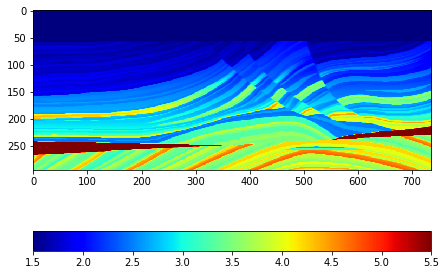

In [44]:
plot_check_model(vp_array, nz_marm, nx_marm)

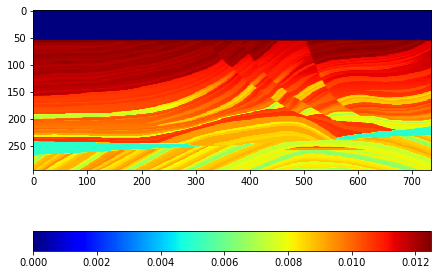

In [45]:
plot_check_model(iQ_array, nz_marm, nx_marm)

In [46]:
### Read seismograms
seis_all_iQ0 = np.load('./in/seism_iQflag_0.npy')
seis_all_iQ1 = np.load('./in/seism_iQflag_1_1stOrder.npy')
seis_all_iQ2 = np.load('./in/seism_iQflag_1_2ndOrder.npy')
seis_water   = np.load('./in/seism_water.npy')

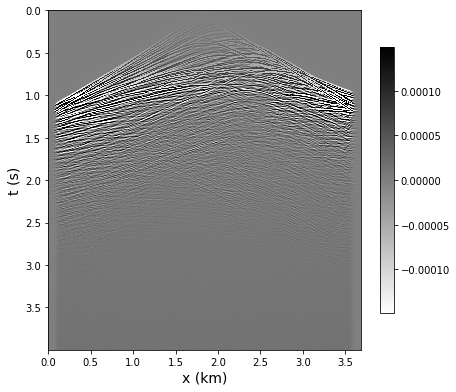

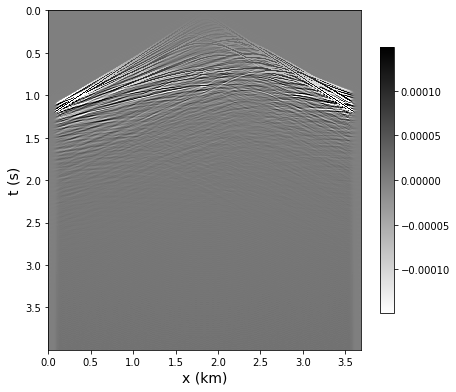

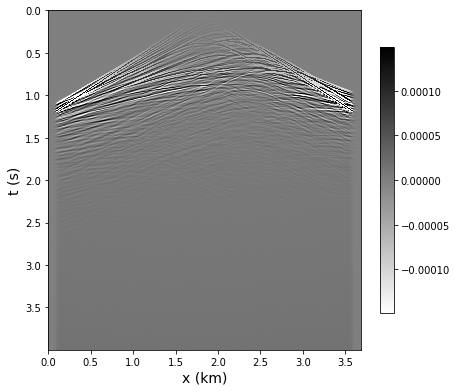

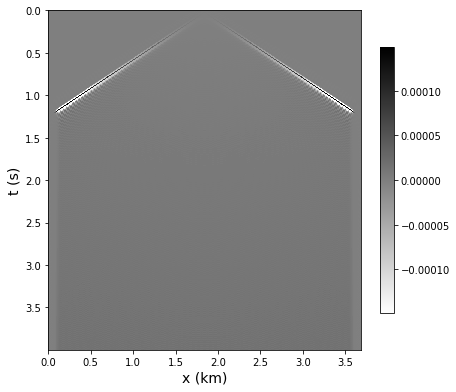

In [47]:
plot_data(seis_all_iQ0, nt, nx, dt, dx, zlab='t (s)', xlab='x (km)', alpha=2, clip=0.001, asp=1, color='binary')

plot_data(seis_all_iQ1, nt, nx, dt, dx, zlab='t (s)', xlab='x (km)', alpha=2, clip=0.001, asp=1, color='binary')

plot_data(seis_all_iQ2, nt, nx, dt, dx, zlab='t (s)', xlab='x (km)', alpha=2, clip=0.001, asp=1, color='binary')

plot_data(seis_water, nt, nx, dt, dx, zlab='t (s)', xlab='x (km)', alpha=2, clip=0.001, asp=1, color='binary')

In [48]:
#### Remove the direct wave from the seismograms
seis_all_iQ0 = seis_all_iQ0 - seis_water
seis_all_iQ1 = seis_all_iQ1 - seis_water
seis_all_iQ2 = seis_all_iQ2 - seis_water

In [49]:
##### Illustration of source-receiver geometry
jsrc = 45
n_absorb = 35

ix_range = range(n_absorb,nx_marm-n_absorb)

iz_range = range(jsrc,nz-n_absorb)

nx_range = nx - 2*n_absorb
nz_range = nz - 2*n_absorb

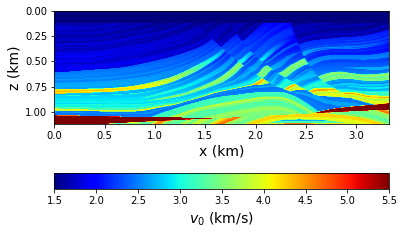

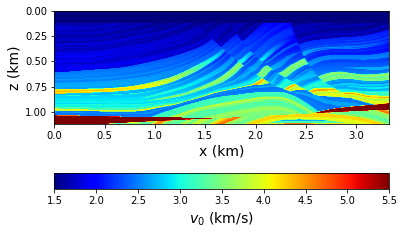

In [50]:
plot_data(vp_array[n_absorb:nz-n_absorb, n_absorb:nx_marm-n_absorb], nz_range, nx_range, dz, dx, \
          zlab='z (km)', xlab='x (km)',alpha=0, barlab="$v_{0}$ (km/s)", barhorn=True, shnk=1, fsize=(6, 6), \
          asp=1, allpos=True, color='jet', fname='./figs/v_noPML.pdf')

### eps figure
plot_data(vp_array[n_absorb:nz-n_absorb, n_absorb:nx_marm-n_absorb], nz_range, nx_range, dz, dx, \
          zlab='z (km)', xlab='x (km)',alpha=0, barlab="$v_{0}$ (km/s)", barhorn=True, shnk=1, fsize=(6, 6), \
          asp=1, allpos=True, color='jet', fname='./figs/v_noPML.eps')

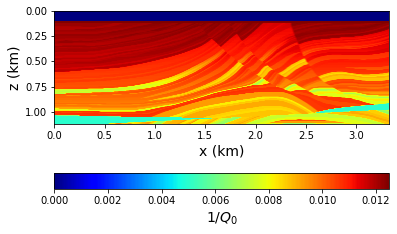

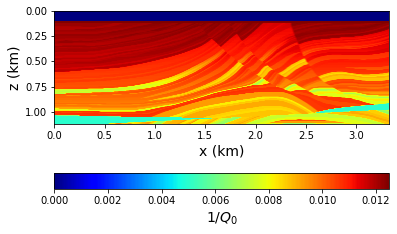

In [51]:
plot_data(iQ_array[n_absorb:nz-n_absorb, n_absorb:nx_marm-n_absorb], nz_range, nx_range, dz, dx, \
          zlab='z (km)', xlab='x (km)', alpha=0, barlab="$1/Q_{0}$", barhorn=True, shnk=1, fsize=(6, 6), \
          asp=1, allpos=True, color='jet', fname='./figs/iQ_noPML.pdf')

### eps figure
plot_data(iQ_array[n_absorb:nz-n_absorb, n_absorb:nx_marm-n_absorb], nz_range, nx_range, dz, dx, \
          zlab='z (km)', xlab='x (km)', alpha=0, barlab="$1/Q_{0}$", barhorn=True, shnk=1, fsize=(6, 6), \
          asp=1, allpos=True, color='jet', fname='./figs/iQ_noPML.eps')

In [52]:
#### truncated nt
nt_trun = 3000

seis_trun_iQ0 = seis_all_iQ0[0:nt_trun,n_absorb:nx_marm-n_absorb]
seis_trun_iQ1 = seis_all_iQ1[0:nt_trun,n_absorb:nx_marm-n_absorb]
seis_trun_iQ2 = seis_all_iQ2[0:nt_trun,n_absorb:nx_marm-n_absorb]

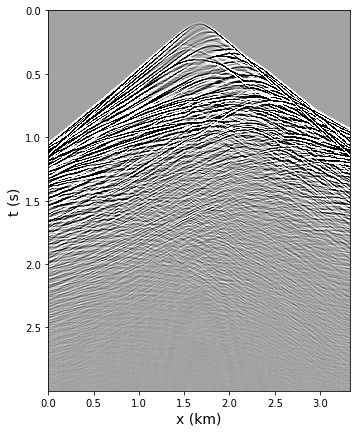

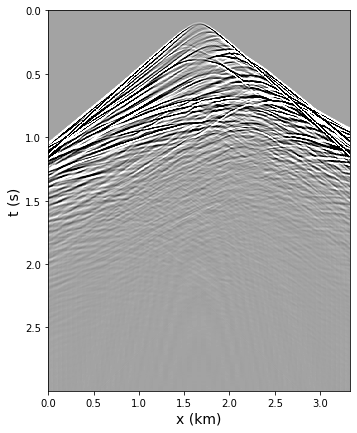

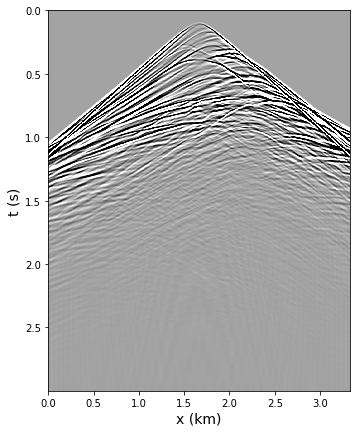

Plot EPS figures


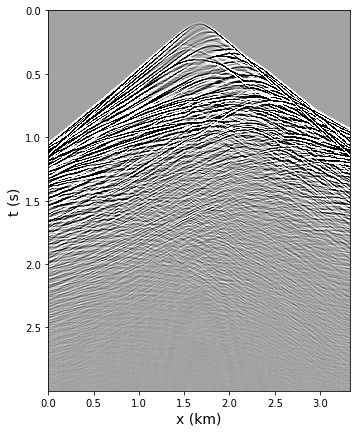

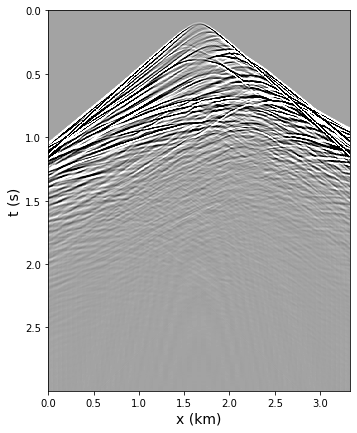

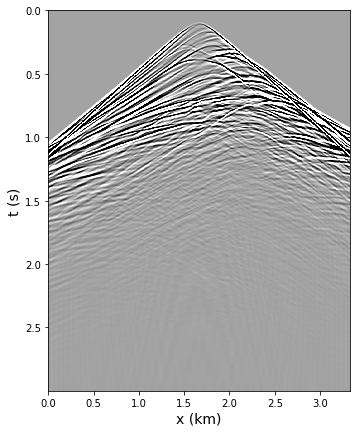

In [53]:
factor = 0.005

val_min = np.min(seis_trun_iQ0) * factor
val_max = np.max(seis_trun_iQ0) * factor


val_range = (val_min, val_max)

#### Enhanced illustration with gaining and clipping
plot_data(seis_trun_iQ0, nt_trun, nx_range, dt, dx, \
          zlab='t (s)', xlab='x (km)', alpha=1.5, clip=1, vrange=val_range, asp=1.4, bar=False, \
          color='binary', fname='./figs/seis_noQ.pdf')

#### Enhanced illustration with gaining and clipping
plot_data(seis_trun_iQ1, nt_trun, nx_range, dt, dx, \
          zlab='t (s)', xlab='x (km)', alpha=1.5, clip=1, vrange=val_range, asp=1.4, bar=False, color='binary', \
         fname='./figs/seis_withQ_1st.pdf')

#### Enhanced illustration with gaining and clipping
plot_data(seis_trun_iQ2, nt_trun, nx_range, dt, dx, \
          zlab='t (s)', xlab='x (km)', alpha=1.5, clip=1, vrange=val_range, asp=1.4, bar=False, color='binary', \
         fname='./figs/seis_withQ_2nd.pdf')

############# Plot EPS figures
print("Plot EPS figures")
#### Enhanced illustration with gaining and clipping
plot_data(seis_trun_iQ0, nt_trun, nx_range, dt, dx, \
          zlab='t (s)', xlab='x (km)', alpha=1.5, clip=1, vrange=val_range, asp=1.4, bar=False, \
          color='binary', fname='./figs/seis_noQ.eps')
#### Enhanced illustration with gaining and clipping
plot_data(seis_trun_iQ1, nt_trun, nx_range, dt, dx, \
          zlab='t (s)', xlab='x (km)', alpha=1.5, clip=1, vrange=val_range, asp=1.4, bar=False, color='binary', \
         fname='./figs/seis_withQ_1st.eps')
#### Enhanced illustration with gaining and clipping
plot_data(seis_trun_iQ2, nt_trun, nx_range, dt, dx, \
          zlab='t (s)', xlab='x (km)', alpha=1.5, clip=1, vrange=val_range, asp=1.4, bar=False, color='binary', \
         fname='./figs/seis_withQ_2nd.eps')

In [54]:
# #### Enhanced illustration with gaining and clipping
# plot_data(seis_all_iQ0[:,n_absorb:nx_marm-n_absorb], nt, nx_range, dt, dx, \
#           zlab='t (s)', xlab='x (km)', alpha=4.5, clip=1, asp=1, bar=False, color='binary', \
#          fname='./figs/seis_noQ_noClip.pdf')

# #### Enhanced illustration with gaining and clipping
# plot_data(seis_all_iQ1[:,n_absorb:nx_marm-n_absorb], nt, nx_range, dt, dx, \
#           zlab='t (s)', xlab='x (km)', alpha=4.5, clip=1, asp=1, bar=False, color='binary', \
#          fname='./figs/seis_withQ_1st_noClip.pdf')

# #### Enhanced illustration with gaining and clipping
# plot_data(seis_all_iQ2[:,n_absorb:nx_marm-n_absorb], nt, nx_range, dt, dx, \
#           zlab='t (s)', xlab='x (km)', alpha=4.5, clip=1, asp=1, bar=False, color='binary', \
#          fname='./figs/seis_withQ_2nd_noClip.pdf')

In [55]:
# fname='./figs/seis_with_Q_2nd_noClip.pdf'
# fname.strip()

After removing the PML boundary, the trace info in the seismogram is:
trace_x = 1.665
trace_id = 333


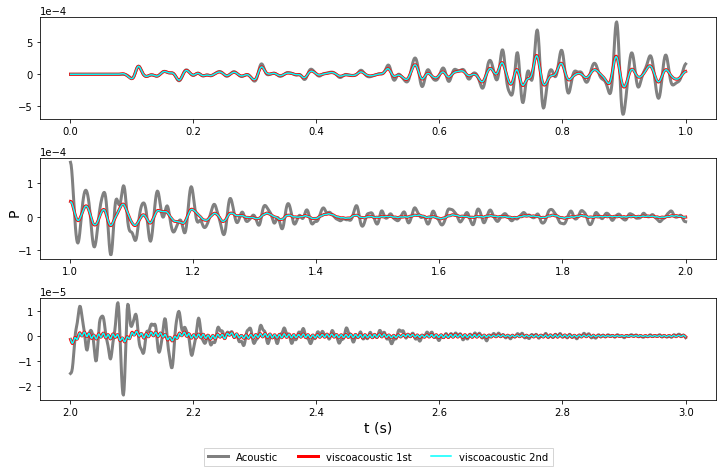

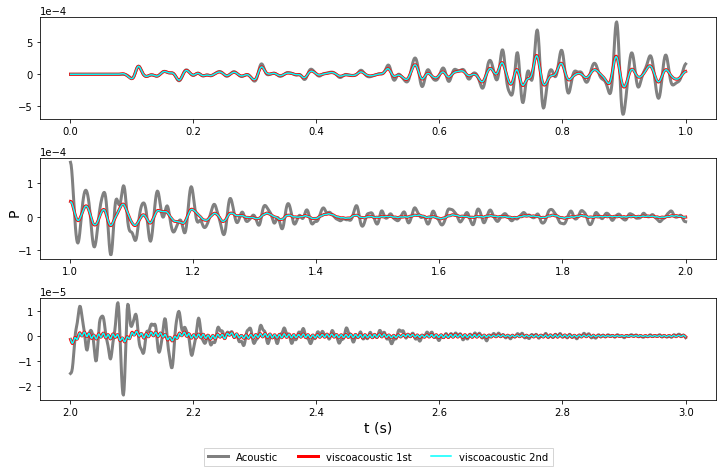

In [56]:
##### central trace
trace_id = int(nx/2)
trace_x  = trace_id * dx

print("After removing the PML boundary, the trace info in the seismogram is:")
trace_id_trun = int((nx-2*n_absorb)/2)
trace_x_trun  = trace_id_trun * dx
print("trace_x = " + str(trace_x_trun))
print("trace_id = " + str(trace_id_trun))

time   = np.arange(nt)*dt
trace0 = seis_all_iQ0[:, trace_id]
trace1 = seis_all_iQ1[:, trace_id]
trace2 = seis_all_iQ2[:, trace_id]

tmin0 = 0.0
tmax0 = 1

itmin0 = int(tmin0/dt) + 1
itmax0 = int(tmax0/dt) + 1

time0   = time[itmin0:itmax0]
trace00 = trace0[itmin0:itmax0]
trace01 = trace1[itmin0:itmax0]
trace02 = trace2[itmin0:itmax0]

tmin1 = 1
tmax1 = 2

itmin1 = int(tmin1/dt) + 1
itmax1 = int(tmax1/dt) + 1

time1   = time[itmin1:itmax1]
trace10 = trace0[itmin1:itmax1]
trace11 = trace1[itmin1:itmax1]
trace12 = trace2[itmin1:itmax1]

tmin2 = 2
tmax2 = 3

itmin2 = int(tmin2/dt) + 1
itmax2 = int(tmax2/dt) + 1

time2   = time[itmin2:itmax2]
trace20 = trace0[itmin2:itmax2]
trace21 = trace1[itmin2:itmax2]
trace22 = trace2[itmin2:itmax2]

tmin3 = 3
tmax3 = 4

itmin3 = int(tmin3/dt) + 1
itmax3 = int(tmax3/dt) + 1

time3   = time[itmin3:itmax3]
trace30 = trace0[itmin3:itmax3]
trace31 = trace1[itmin3:itmax3]
trace32 = trace2[itmin3:itmax3]


timelist   = [time0,   time1,   time2,   time3]
trace0list = [trace00, trace10, trace20, trace30]
trace1list = [trace01, trace11, trace21, trace31]
trace2list = [trace02, trace12, trace22, trace32]

gain=0.8

figname = "./figs/seis_trace_center.pdf"
plot_multiplots_3traces(timelist, trace0list, trace1list, trace2list, nplt=3, alpha=gain, \
                        ylab="P", xlab="t (s)", fsize=(10, 6), fname=figname)

### eps figure
figname_eps = "./figs/seis_trace_center.eps"
plot_multiplots_3traces(timelist, trace0list, trace1list, trace2list, nplt=3, alpha=gain, \
                        ylab="P", xlab="t (s)", fsize=(10, 6), fname=figname_eps)

After removing the PML boundary, the trace info in the seismogram is:
trace_x = 0.325
trace_id = 65


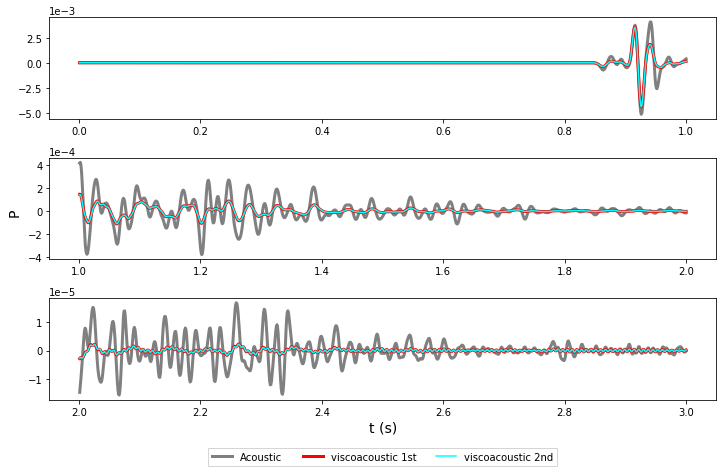

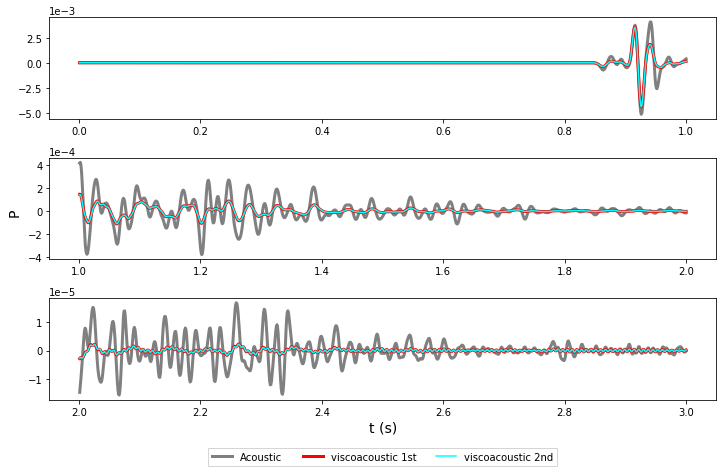

In [57]:
### The another trace
trace_x  = 0.5
trace_id = int(trace_x/dx)

print("After removing the PML boundary, the trace info in the seismogram is:")
trace_id_trun = int(trace_x/dx - n_absorb)
trace_x_trun  = trace_id_trun * dx
print("trace_x = " + str(trace_x_trun))
print("trace_id = " + str(trace_id_trun))

time   = np.arange(nt)*dt
trace0 = seis_all_iQ0[:, trace_id]
trace1 = seis_all_iQ1[:, trace_id]
trace2 = seis_all_iQ2[:, trace_id]

tmin0 = 0.0
tmax0 = 1

itmin0 = int(tmin0/dt) + 1
itmax0 = int(tmax0/dt) + 1

time0   = time[itmin0:itmax0]
trace00 = trace0[itmin0:itmax0]
trace01 = trace1[itmin0:itmax0]
trace02 = trace2[itmin0:itmax0]

tmin1 = 1
tmax1 = 2

itmin1 = int(tmin1/dt) + 1
itmax1 = int(tmax1/dt) + 1

time1   = time[itmin1:itmax1]
trace10 = trace0[itmin1:itmax1]
trace11 = trace1[itmin1:itmax1]
trace12 = trace2[itmin1:itmax1]

tmin2 = 2
tmax2 = 3

itmin2 = int(tmin2/dt) + 1
itmax2 = int(tmax2/dt) + 1

time2   = time[itmin2:itmax2]
trace20 = trace0[itmin2:itmax2]
trace21 = trace1[itmin2:itmax2]
trace22 = trace2[itmin2:itmax2]

# tmin3 = 3
# tmax3 = 4

# itmin3 = int(tmin3/dt) + 1
# itmax3 = int(tmax3/dt) + 1

# time3   = time[itmin3:itmax3]
# trace30 = trace0[itmin3:itmax3]
# trace31 = trace1[itmin3:itmax3]
# trace32 = trace2[itmin3:itmax3]


timelist   = [time0,   time1,   time2]
trace0list = [trace00, trace10, trace20]
trace1list = [trace01, trace11, trace21]
trace2list = [trace02, trace12, trace22]

gain=0.8

figname = "./figs/seis_trace_left.pdf"
plot_multiplots_3traces(timelist, trace0list, trace1list, trace2list, nplt=3, alpha=gain, ylab="P", xlab="t (s)", \
                        fsize=(10, 6), fname=figname)

### eps figure
figname_eps = "./figs/seis_trace_left.eps"
plot_multiplots_3traces(timelist, trace0list, trace1list, trace2list, nplt=3, alpha=gain, ylab="P", xlab="t (s)", \
                        fsize=(10, 6), fname=figname_eps)

After removing the PML boundary, the trace info in the seismogram is:
trace_x = 2.825
trace_id = 565


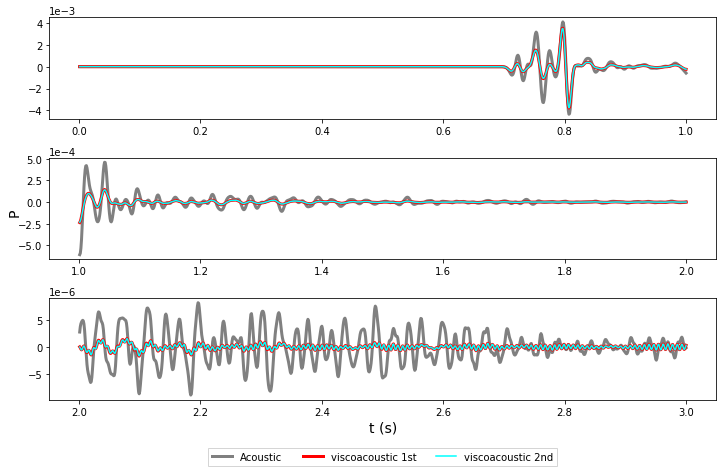

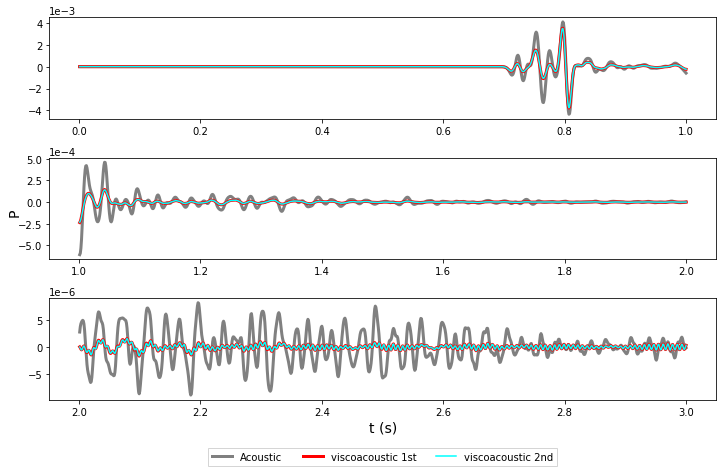

In [58]:
### The another trace
trace_x  = 3.0
trace_id = int(trace_x/dx)

print("After removing the PML boundary, the trace info in the seismogram is:")
trace_id_trun = int(trace_x/dx - n_absorb)
trace_x_trun  = trace_id_trun * dx
print("trace_x = " + str(trace_x_trun))
print("trace_id = " + str(trace_id_trun))

time   = np.arange(nt)*dt
trace0 = seis_all_iQ0[:, trace_id]
trace1 = seis_all_iQ1[:, trace_id]
trace2 = seis_all_iQ2[:, trace_id]

tmin0 = 0.0
tmax0 = 1

itmin0 = int(tmin0/dt) + 1
itmax0 = int(tmax0/dt) + 1

time0   = time[itmin0:itmax0]
trace00 = trace0[itmin0:itmax0]
trace01 = trace1[itmin0:itmax0]
trace02 = trace2[itmin0:itmax0]

tmin1 = 1
tmax1 = 2

itmin1 = int(tmin1/dt) + 1
itmax1 = int(tmax1/dt) + 1

time1   = time[itmin1:itmax1]
trace10 = trace0[itmin1:itmax1]
trace11 = trace1[itmin1:itmax1]
trace12 = trace2[itmin1:itmax1]

tmin2 = 2
tmax2 = 3

itmin2 = int(tmin2/dt) + 1
itmax2 = int(tmax2/dt) + 1

time2   = time[itmin2:itmax2]
trace20 = trace0[itmin2:itmax2]
trace21 = trace1[itmin2:itmax2]
trace22 = trace2[itmin2:itmax2]

# tmin3 = 3
# tmax3 = 4

# itmin3 = int(tmin3/dt) + 1
# itmax3 = int(tmax3/dt) + 1

# time3   = time[itmin3:itmax3]
# trace30 = trace0[itmin3:itmax3]
# trace31 = trace1[itmin3:itmax3]
# trace32 = trace2[itmin3:itmax3]


timelist   = [time0,   time1,   time2]
trace0list = [trace00, trace10, trace20]
trace1list = [trace01, trace11, trace21]
trace2list = [trace02, trace12, trace22]

gain=0.8

figname = "./figs/seis_trace_right.pdf"
plot_multiplots_3traces(timelist, trace0list, trace1list, trace2list, nplt=3, alpha=gain, ylab="P", xlab="t (s)", \
                        fsize=(10, 6), fname=figname)

### eps figure
figname_eps = "./figs/seis_trace_right.eps"
plot_multiplots_3traces(timelist, trace0list, trace1list, trace2list, nplt=3, alpha=gain, ylab="P", xlab="t (s)", \
                        fsize=(10, 6), fname=figname_eps)